In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SSLimPy.interface.sslimpy as sslimpy
from copy import copy

import astropy.units as u

In [2]:
cosmodict={"h":0.67,"Omegam":0.32,"Omegab":0.04,"As":2.1e-9, "mnu":0.06}
settings = {"code":"class",
            "do_RSD" : True,
            "nonlinearRSD" : True,
            "FoG_damp" : "ISTF_like",
            "do_onehalo" : True,
            "halo_model_PS" : False,
            "output" : ["Power spectrum"],
            }

Asslimpy = sslimpy.sslimpy(settings_dict=settings,
                           cosmopars=cosmodict)

#--------------------------------------------------#

  SSSSS   SSSSS  L       i            PPPP   y    y 
 S     S S     S L            m   m   P    P y   y  
 S       S       L     iii   m m m m  P    P  y y   
  SSSSS   SSSSS  L       i   m  m  m  PPPP     y    
       S       S L       i   m     m  P        y    
 S     S S     S L       i   m     m  P       y     
  SSSSS   SSSSS  LLLLL iiiii m     m  P      y      

#--------------------------------------------------#


In [3]:
cosmodict={
        "h":0.67,
        "Omegam":0.32,
        "Omegab":0.04,
        "As":2.1e-9, 
        "mnu":0.06}

astrodict = {
    "model_type": "LF",
    "model_name": "SchCut",
    "model_par":{
        "phistar": 9.6e-11 * u.Lsun**-1 * u.Mpc**-3,
        "Lstar": 2.1e6 * u.Lsun,
        "alpha": -1.87,
        "Lmin": 5000 * u.Lsun,
    },
    "nu" : 115*u.GHz,
    "nuObs" : [30,60]*u.GHz,
}

BAOdict = {
    "Pshot":[0,0],
    "sigmaV":[5,8],
}

# testing model
def v_of_M(M):
    v0 = 300 * u.km / u.s 
    return v0 * np.power(M/ (1e10*u.Msun),1/2) 

astrodict = {
    "model_type": "ML",
    "model_name": "MassPow",
    "model_par": {
        'A':2e-6,
        'b':1.,
        },
    "v_of_M" : v_of_M,
}

In [4]:
Asslimpy.compute(
                cosmopars=cosmodict,
                astropars=astrodict,
                BAOpars=BAOdict,
                )

Done!


/home/sefa/Desktop/LIM-Code/SSLimPy/SSLimPy/interface/sslimpy.py:75: UserWarning: Output Power spectrum asked for not recognised 
 Skiped
  warn("Output {} asked for not recognised \n Skiped".format(obs))


{'Power spectrum': <SSLimPy.LIMsurvey.PowerSpectra.PowerSpectra at 0x780ecc899ee0>}

## Lets try to Compute the derivative of P_0 with respect to h 

In [5]:
fidh = cosmodict["h"]
eps = 1e-2
steph = [fidh*(1-eps),fidh,fidh*(1+eps)]

P0_t = []
k = []
for h in steph:
    temp_cosmo = copy(cosmodict)
    temp_cosmo["h"] = h
    returnclass = Asslimpy.compute(
                    cosmopars=temp_cosmo,
                    astropars=astrodict,
                    BAOpars=BAOdict,
                    )["Power spectrum"]
    P0_t.append(returnclass.Pk_0bs)
    k.append( returnclass.k)

P0_t = np.array(P0_t)

Done!
Done!
Done!


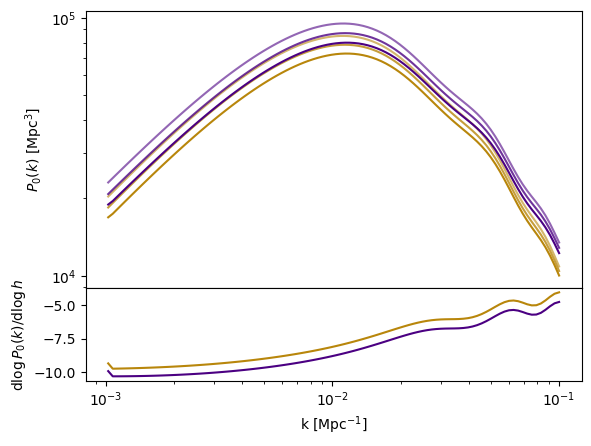

In [16]:
fig, axs = plt.subplots(2,1,sharex=True,height_ratios=[3,1])
k = np.array(k)
alpha = [0.6,0.8,1]
for ia, ai in enumerate(alpha):
    axs[0].loglog(k[0,:100], P0_t[ia,:100,0], c="darkgoldenrod", alpha=ai)
    axs[0].loglog(k[0,:100], P0_t[ia,:100,1], c="indigo", alpha=ai)

axs[0].set_ylabel(r"$P_0(k)$ $[\mathrm{Mpc}^{3}]$")
axs[1].set_ylabel(r"$\mathrm{d} \log{P_0(k)}/\mathrm{d} \log{h}$")
axs[1].set_xlabel(r"k $[\mathrm{Mpc}^{-1}]$")

dP = (P0_t[2,:,:] - P0_t[0,:,:]) / P0_t[1,:,:] / (2*eps)
axs[1].plot(k[0,:100],dP[:100,0],c="darkgoldenrod")
axs[1].plot(k[0,:100],dP[:100,1],c="indigo")

fig.subplots_adjust(hspace=0)